# Analysis 5

* analyse the variable
* from previous analyses we can find out that the happiness scores difference between Western Europe and  Central and Eastern Europe is large. In this analysis, let's find out each how variables influence the outcomes.

In [2]:
import pandas as pd
# from pythainlp.segment import segment
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
# define the function to calculate and create the total score of happiness.
def getTotalScore(str):
    # load the data
    data = pd.read_csv(str)
    # get all the columns that to be added together
    colums = data.ix[:,2:]
    # add the new column named 'total score'
    # data['total score'] = colums.sum(axis = 1).head()
    data['total score'] = np.sum(colums,axis = 1)
    # return the data frame
    return data

In [4]:
data2015=getTotalScore('data/2015.csv')
data2016=getTotalScore('data/2016.csv')

In [5]:
#define the function to sort based on total score and add a new column named rank
def getRank(data):
    newData = data.sort_values(by='total score',ascending=False)
    newData['Rank'] = range(1,len(data) + 1)
    newData.index = range(0,len(data))
    return newData

In [6]:
data1 = getRank(data2015)
data2 = getRank(data2016)

In [7]:
data1['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [8]:
w_europe = data1[data1.Region=='Western Europe']
ec_europe = data1[data1.Region=='Central and Eastern Europe']
europe = pd.concat([w_europe,ec_europe],axis=0)
europe.head()

,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,total score,Rank
0,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.58696,1
1,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.56092,2
2,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.52708,3
3,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.52222,4
5,Finland,Western Europe,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,7.40609,6


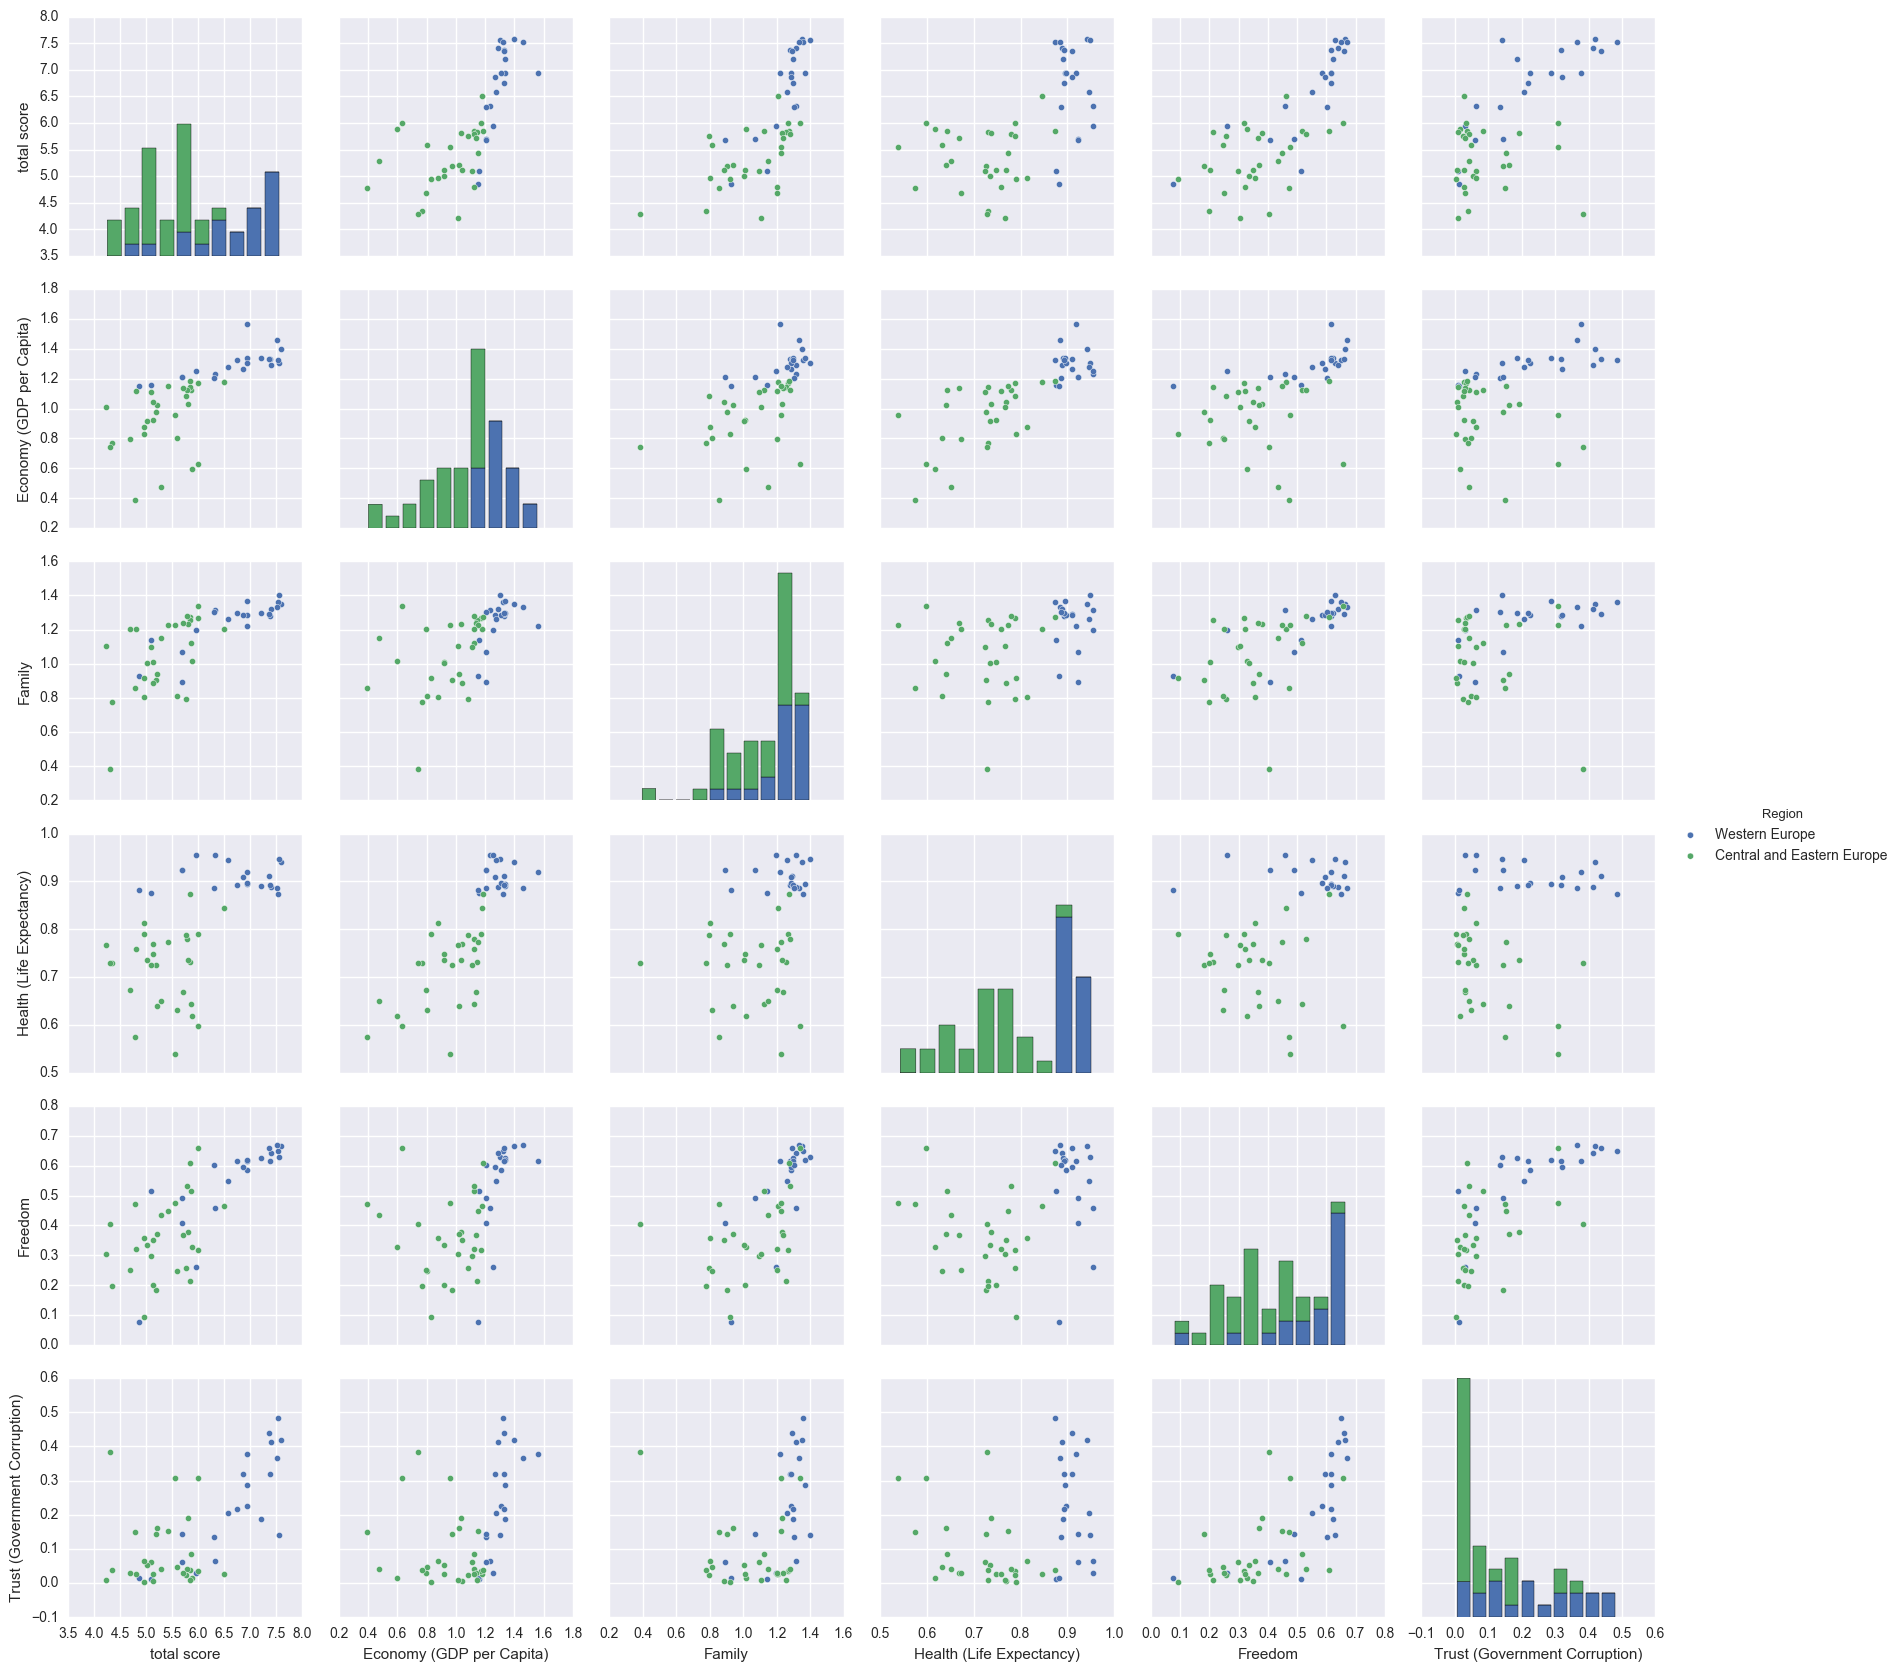

In [11]:
# Visualizing pairwise relationships in a dataset
selectCols=  ['total score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Region']
sns.pairplot(europe[selectCols], hue='Region',size=2.8)
plt.savefig('5-1.png')

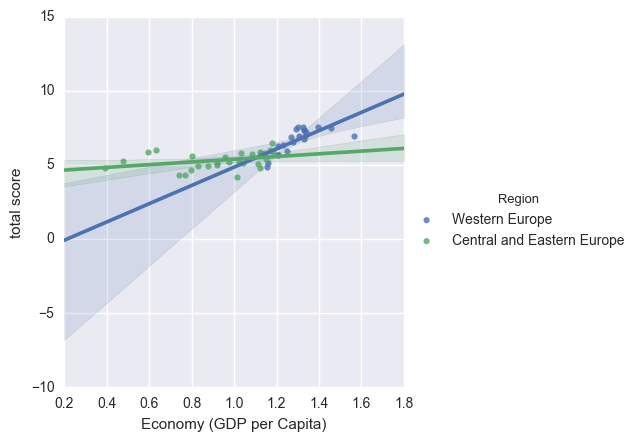

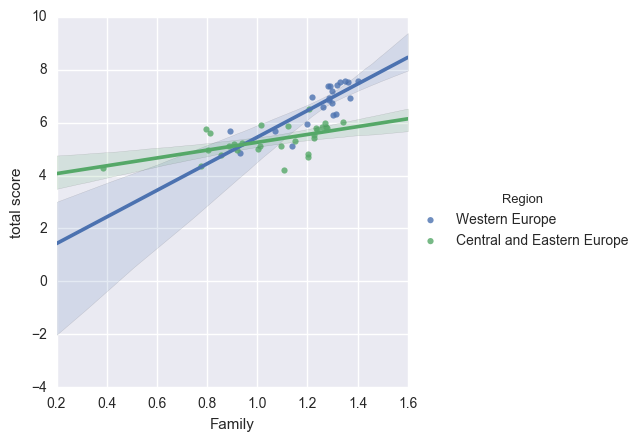

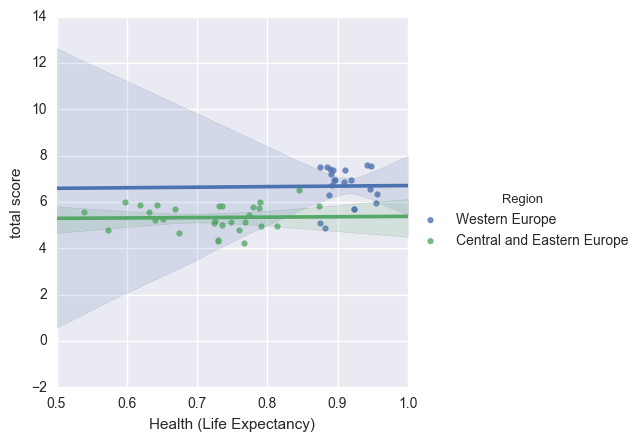

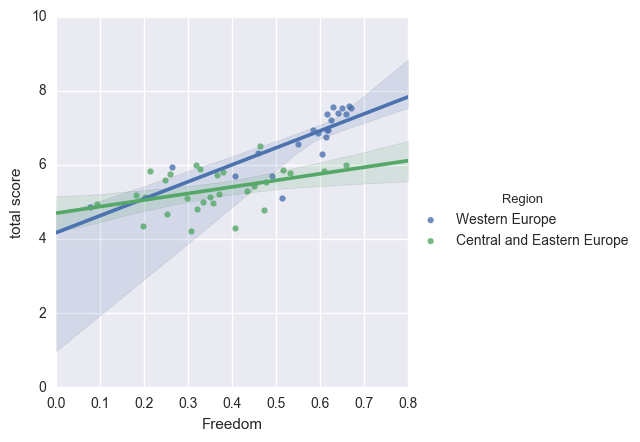

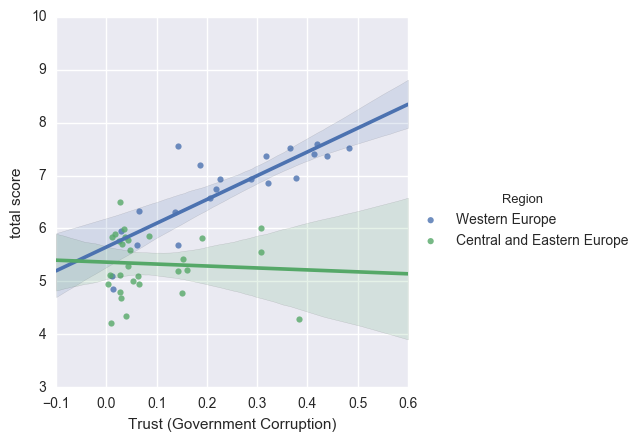

In [30]:
selectCols= ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
for one in selectCols:
    sns.lmplot(data=europe, x = one, y='total score', hue='Region',size=4.5)
    plt.savefig('5'+one +'.png')


In [17]:
# get the DataFrame of all aisa contries
se_Asia = data1[data1.Region=='Southeastern Asia']
s_Asia = data1[data1.Region=='Southern Asia']
e_Asia = data1[data1.Region=='Eastern Asia']

asia = pd.concat([se_Asia,s_Asia,e_Asia],axis=0)
asia.head()

,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,total score,Rank
23,Singapore,Southeastern Asia,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501,6.79779,24
33,Thailand,Southeastern Asia,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945,6.45470,34
60,Malaysia,Southeastern Asia,1.12486,1.07023,0.72394,0.53024,0.10501,0.33075,1.88541,5.77044,61
73,Indonesia,Southeastern Asia,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399,5.39873,74
74,Vietnam,Southeastern Asia,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173,5.36036,75


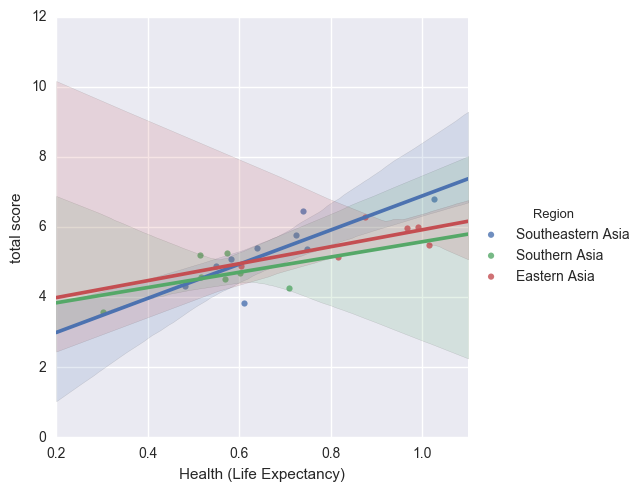

In [18]:
sns.lmplot(data=asia,x='Health (Life Expectancy)',y='total score',hue="Region")

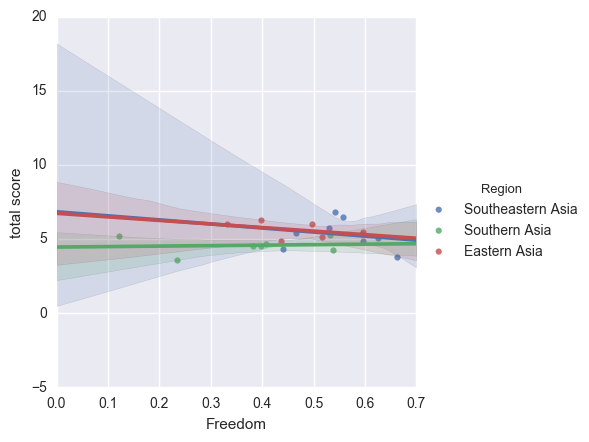

In [31]:
sns.lmplot(data=asia, x = 'Freedom', y='total score', hue='Region',size=4.5)
plt.savefig('5-6.png')

In [ ]:
se_Asia = data1[data1.Region=='Southeastern Asia']
s_Asia = data1[data1.Region=='Southern Asia']
e_Asia = data1[data1.Region=='Eastern Asia']



//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


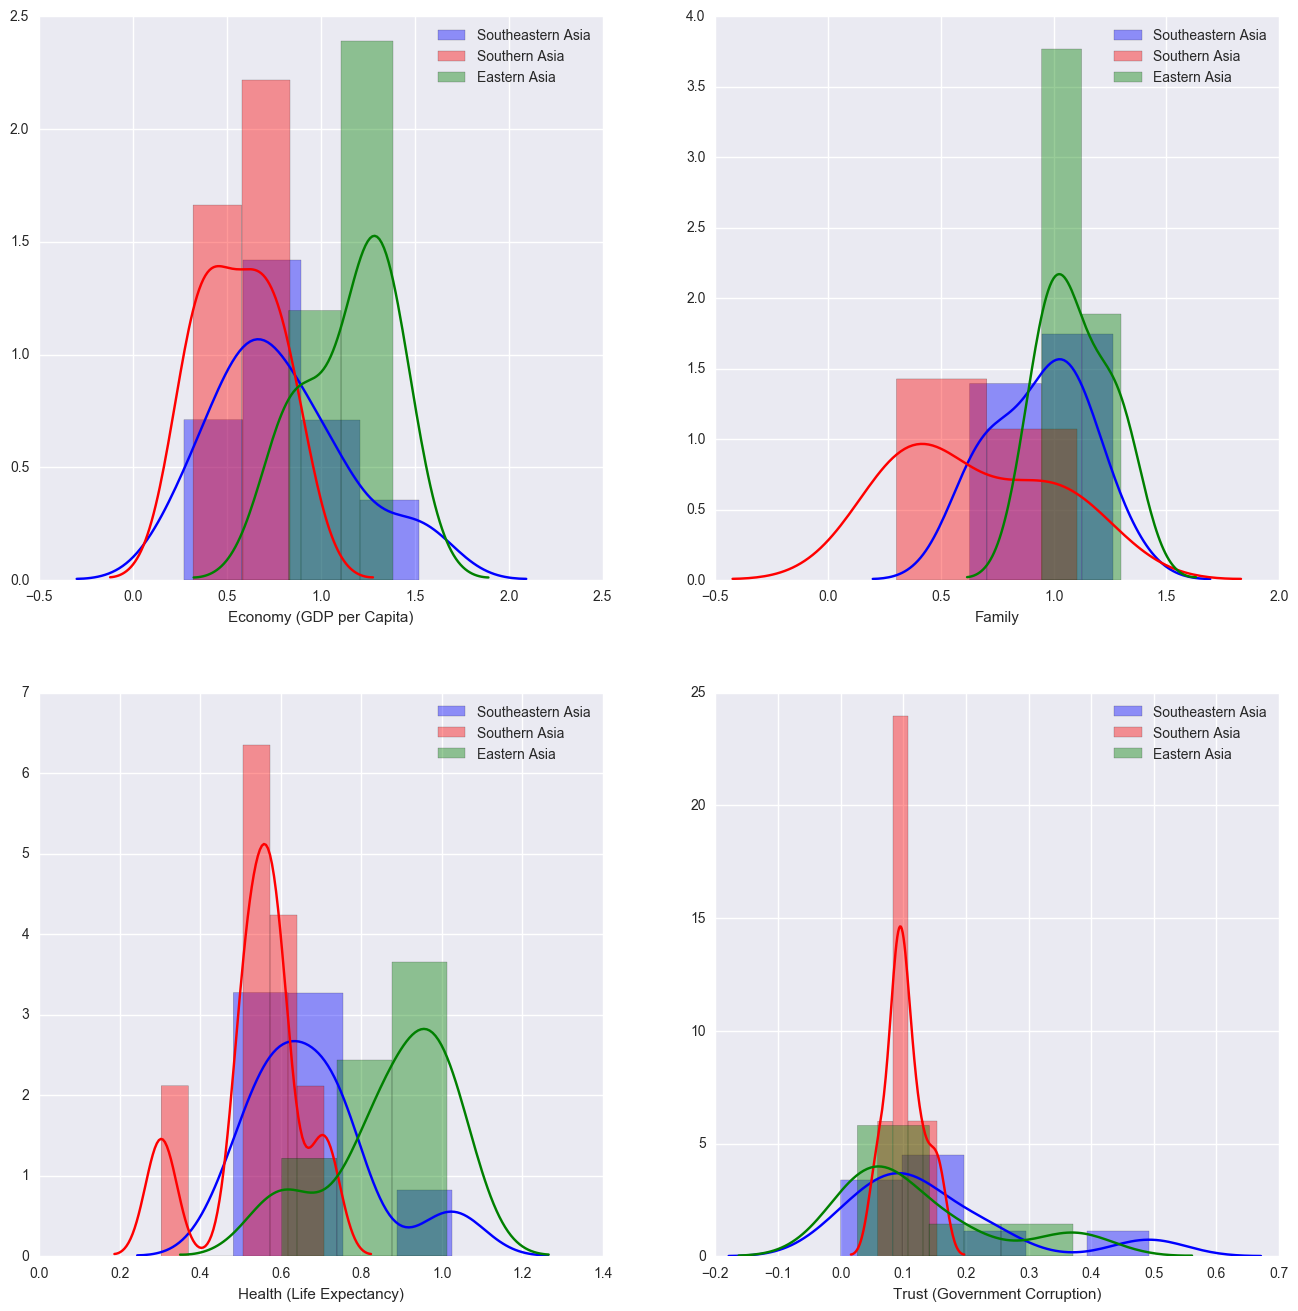

In [32]:
f, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()
compareCols = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Trust (Government Corruption)']
for i in range(len(compareCols)):
    col = compareCols[i]
    axi = axes[i]
    sns.distplot(se_Asia[col],color='blue' , label='Southeastern Asia', ax=axi)
    sns.distplot(s_Asia[col],color='r', label='Southern Asia',ax=axi)
    sns.distplot(e_Asia[col],color='green', label='Eastern Asia',ax=axi)
    axi.legend()
plt.savefig('5-7.png')